# Module 7 Project

This project implements machine learning and object based programming where we can make predictions. This project is by guided instruction from the text book

In [100]:
#Import Dependencies 

import pandas as pd
from scipy import stats
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

## Part 1 - Chart a Straight Line 

In [101]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range (0, 101, 10)]

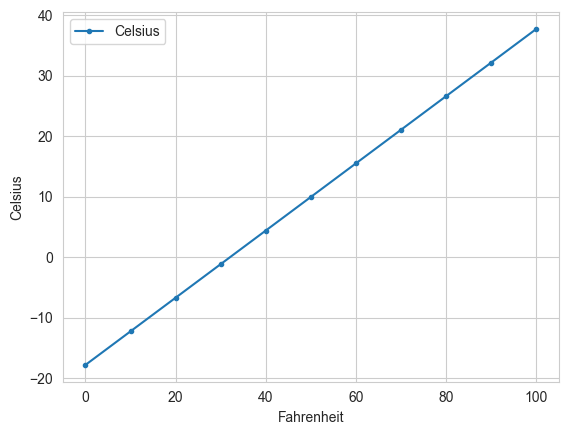

In [102]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [103]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [104]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [105]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning 

In [106]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [107]:
nyc_df.Date.dtype

dtype('int64')

### Section 4 - Descriptive Statistics 

In [108]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [109]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope

np.float64(0.014771361132966163)

In [110]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict 

In [111]:
print(f"Avg high temp in Jan 2024: {linear_regression.slope * 2024 + linear_regression.intercept} Degrees F")

Avg high temp in Jan 2024: 38.5922281667978 Degrees F


### Section 7 - Visualizations 

(10.0, 70.0)

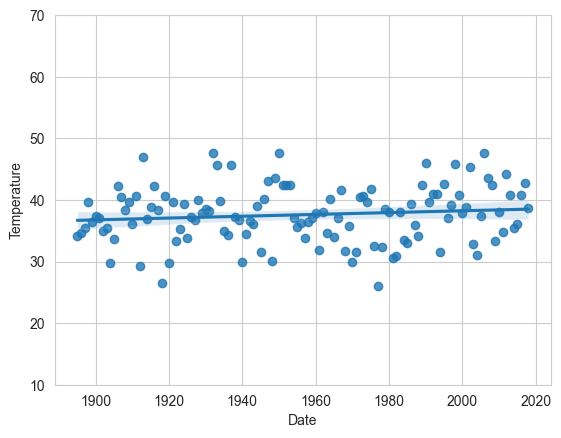

In [112]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction 

### Section 1 - Build the Model 

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
    random_state=11)

print(X_train.shape)
print(X_test.shape)

(93, 1)
(31, 1)


In [123]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print(f"Coef_ is: {linear_regression.coef_}")
print(f"Intercept is: {linear_regression.intercept_}")

Coef_ is: [0.01939167]
Intercept is: -0.30779820252656975


### Section 2 - Test the Model 

In [119]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict 

In [120]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

array([38.94094855])

### Section 4 - Visualizations 

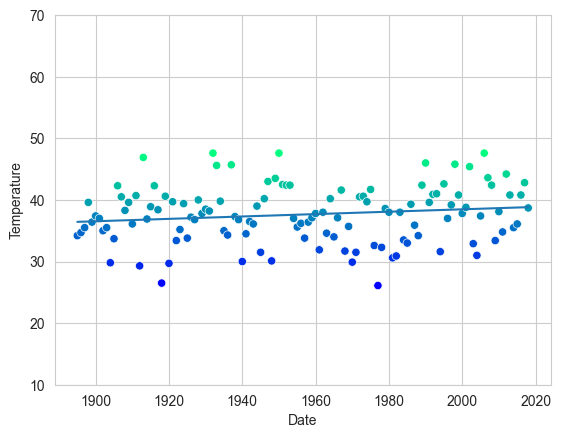

In [121]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Part 4 - Insights 

Both methods can be efficient in displaying data, however the scikit-learn model is much more appealing and easier to read the data.

Scipy gets the job done, but does not have the same testing capabilities as scikit-learn model 

Scikit-learn model should be used for the more complex projects, but Scipy can also be used for easier data projects

